# REGENERATION
# TEAM 3

## Exploratory Data Analysis

## Preparations

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import collections
from scipy import stats
from difflib import SequenceMatcher

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 

In [3]:
#Για να μην χρειαστούν modifications στο παρόν, έχετε το excel στον ίδιο φάκελο με το notebook.
df = pd.read_excel("mpg.data.xlsx")

## Basic data set Exploration

In [4]:
# Βλέπουμε τις πρώτες γραμμές
df.head()

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,NaN,NaN,NaN,NaN
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,NaN,NaN,NaN,NaN
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,NaN,NaN,NaN,NaN
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,NaN,NaN,NaN,NaN
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,NaN,NaN,NaN,NaN


In [5]:
df.iloc[:,12].unique()

array([nan, '  '], dtype=object)

In [6]:
#Το παραπάνω entry στην τελευταία στήλη δημιούργησε τις 4 τελευταίες στήλες. Τις δι΄ώχνουμε.
df.drop(df.iloc[:, 9:13], inplace = True, axis = 1)

In [7]:
# Βλέπουμε τις τελευταίες γραμμές βεβαιώνοντας ταυτόχρονα ότι οι τελευταίες στήλες έχουν διαγραφεί
df.tail()

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name
401,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
402,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
403,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
404,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger
405,31.0,4,119.0,82.0,2720,19.4,82,1,chevy s-10


In [8]:
#Τυχαία δειγματοληψία 5 σειρών
df.sample(5)

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name
386,38.0,4,105.0,63.0,2125,14.7,82,1,plymouth horizon miser
262,25.1,4,140.0,88.0,2720,15.4,78,1,ford fairmont (man)
33,11.0,8,318.0,210.0,4382,13.5,70,1,dodge d200
100,14.0,8,318.0,150.0,4237,14.5,73,1,plymouth fury gran sedan
294,16.5,8,351.0,138.0,3955,13.2,79,1,mercury grand marquis


In [9]:
# Διαστάσεις του dataframe
df.shape

(406, 9)

In [10]:
#type of values in each column.categorical (object) and numeric (float and int)
df.dtypes

mpg             float64
cylinders         int64
displayments    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [11]:
#Μετατροπή origin σε string
df['origin'] = df['origin'].astype('str')

In [12]:
df.dtypes

mpg             float64
cylinders         int64
displayments    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin           object
car name         object
dtype: object

In [13]:
# metadata
df.columns

Index(['mpg', 'cylinders', 'displayments', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [14]:
#Ποσότητα μοναδικών τιμών σε κάθε στήλη
df.nunique()

mpg             129
cylinders         5
displayments     83
horsepower       93
weight          356
acceleration     96
model year       13
origin            3
car name        312
dtype: int64

In [15]:
# Μοναδικές τιμές στους κυλίνδρους και count στην κάθε τιμή
df['cylinders'].value_counts()
# Πολύ λίγες τιμές σε 3 και 5 κυλίνδρους

4    207
8    108
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [16]:
# Συνολικά null values σε κάθε στήλη. Θα ασχοληθώ στο pre processing με τα συγκεκριμένα
df.isnull().sum()

mpg             8
cylinders       0
displayments    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

## Numeric Features

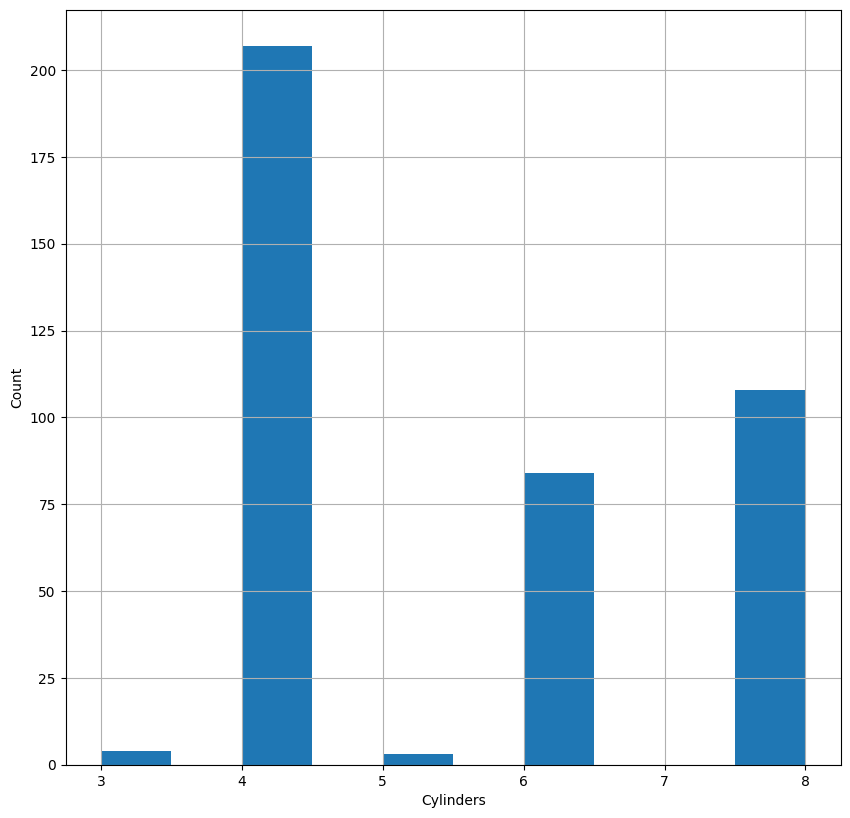

In [17]:
df['cylinders'].hist(figsize=(10,10))
plt.xlabel("Cylinders")
plt.ylabel("Count")
plt.show()

In [18]:
#Μορφοποίηση παλέττας
sns.set(style="white", palette="muted", color_codes=True)

In [19]:
df.groupby(['model year']).mean()
#Παρατηρούμε αλλαγές στο mpg με το πέρασμα του χρόνου. Βλέπουμε όμως αλλαγή και σε άλλες μεταβλητές.
# Ίσως η αλλαγή του mpg να οφείλεται και σε αυτές. Θα επανέλθουμε

,mpg,cylinders,displayments,horsepower,weight,acceleration
model year,,,,,,
70,17.689655,6.857143,286.857143,148.857143,3441.314286,12.714286
71,21.250000,5.517241,205.862069,104.928571,2960.344828,15.310345
72,18.714286,5.821429,218.375000,120.178571,3237.714286,15.125000
73,17.100000,6.375000,256.875000,130.475000,3419.025000,14.312500
74,22.703704,5.259259,171.740741,94.230769,2877.925926,16.203704
75,20.266667,5.600000,205.533333,101.066667,3176.800000,16.050000
76,21.573529,5.647059,197.794118,101.117647,3078.735294,15.941176
77,23.375000,5.464286,191.392857,105.071429,2997.357143,15.435714
78,24.061111,5.361111,177.805556,99.694444,2861.805556,15.805556


c:\users\ezet\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\ezet\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\ezet\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

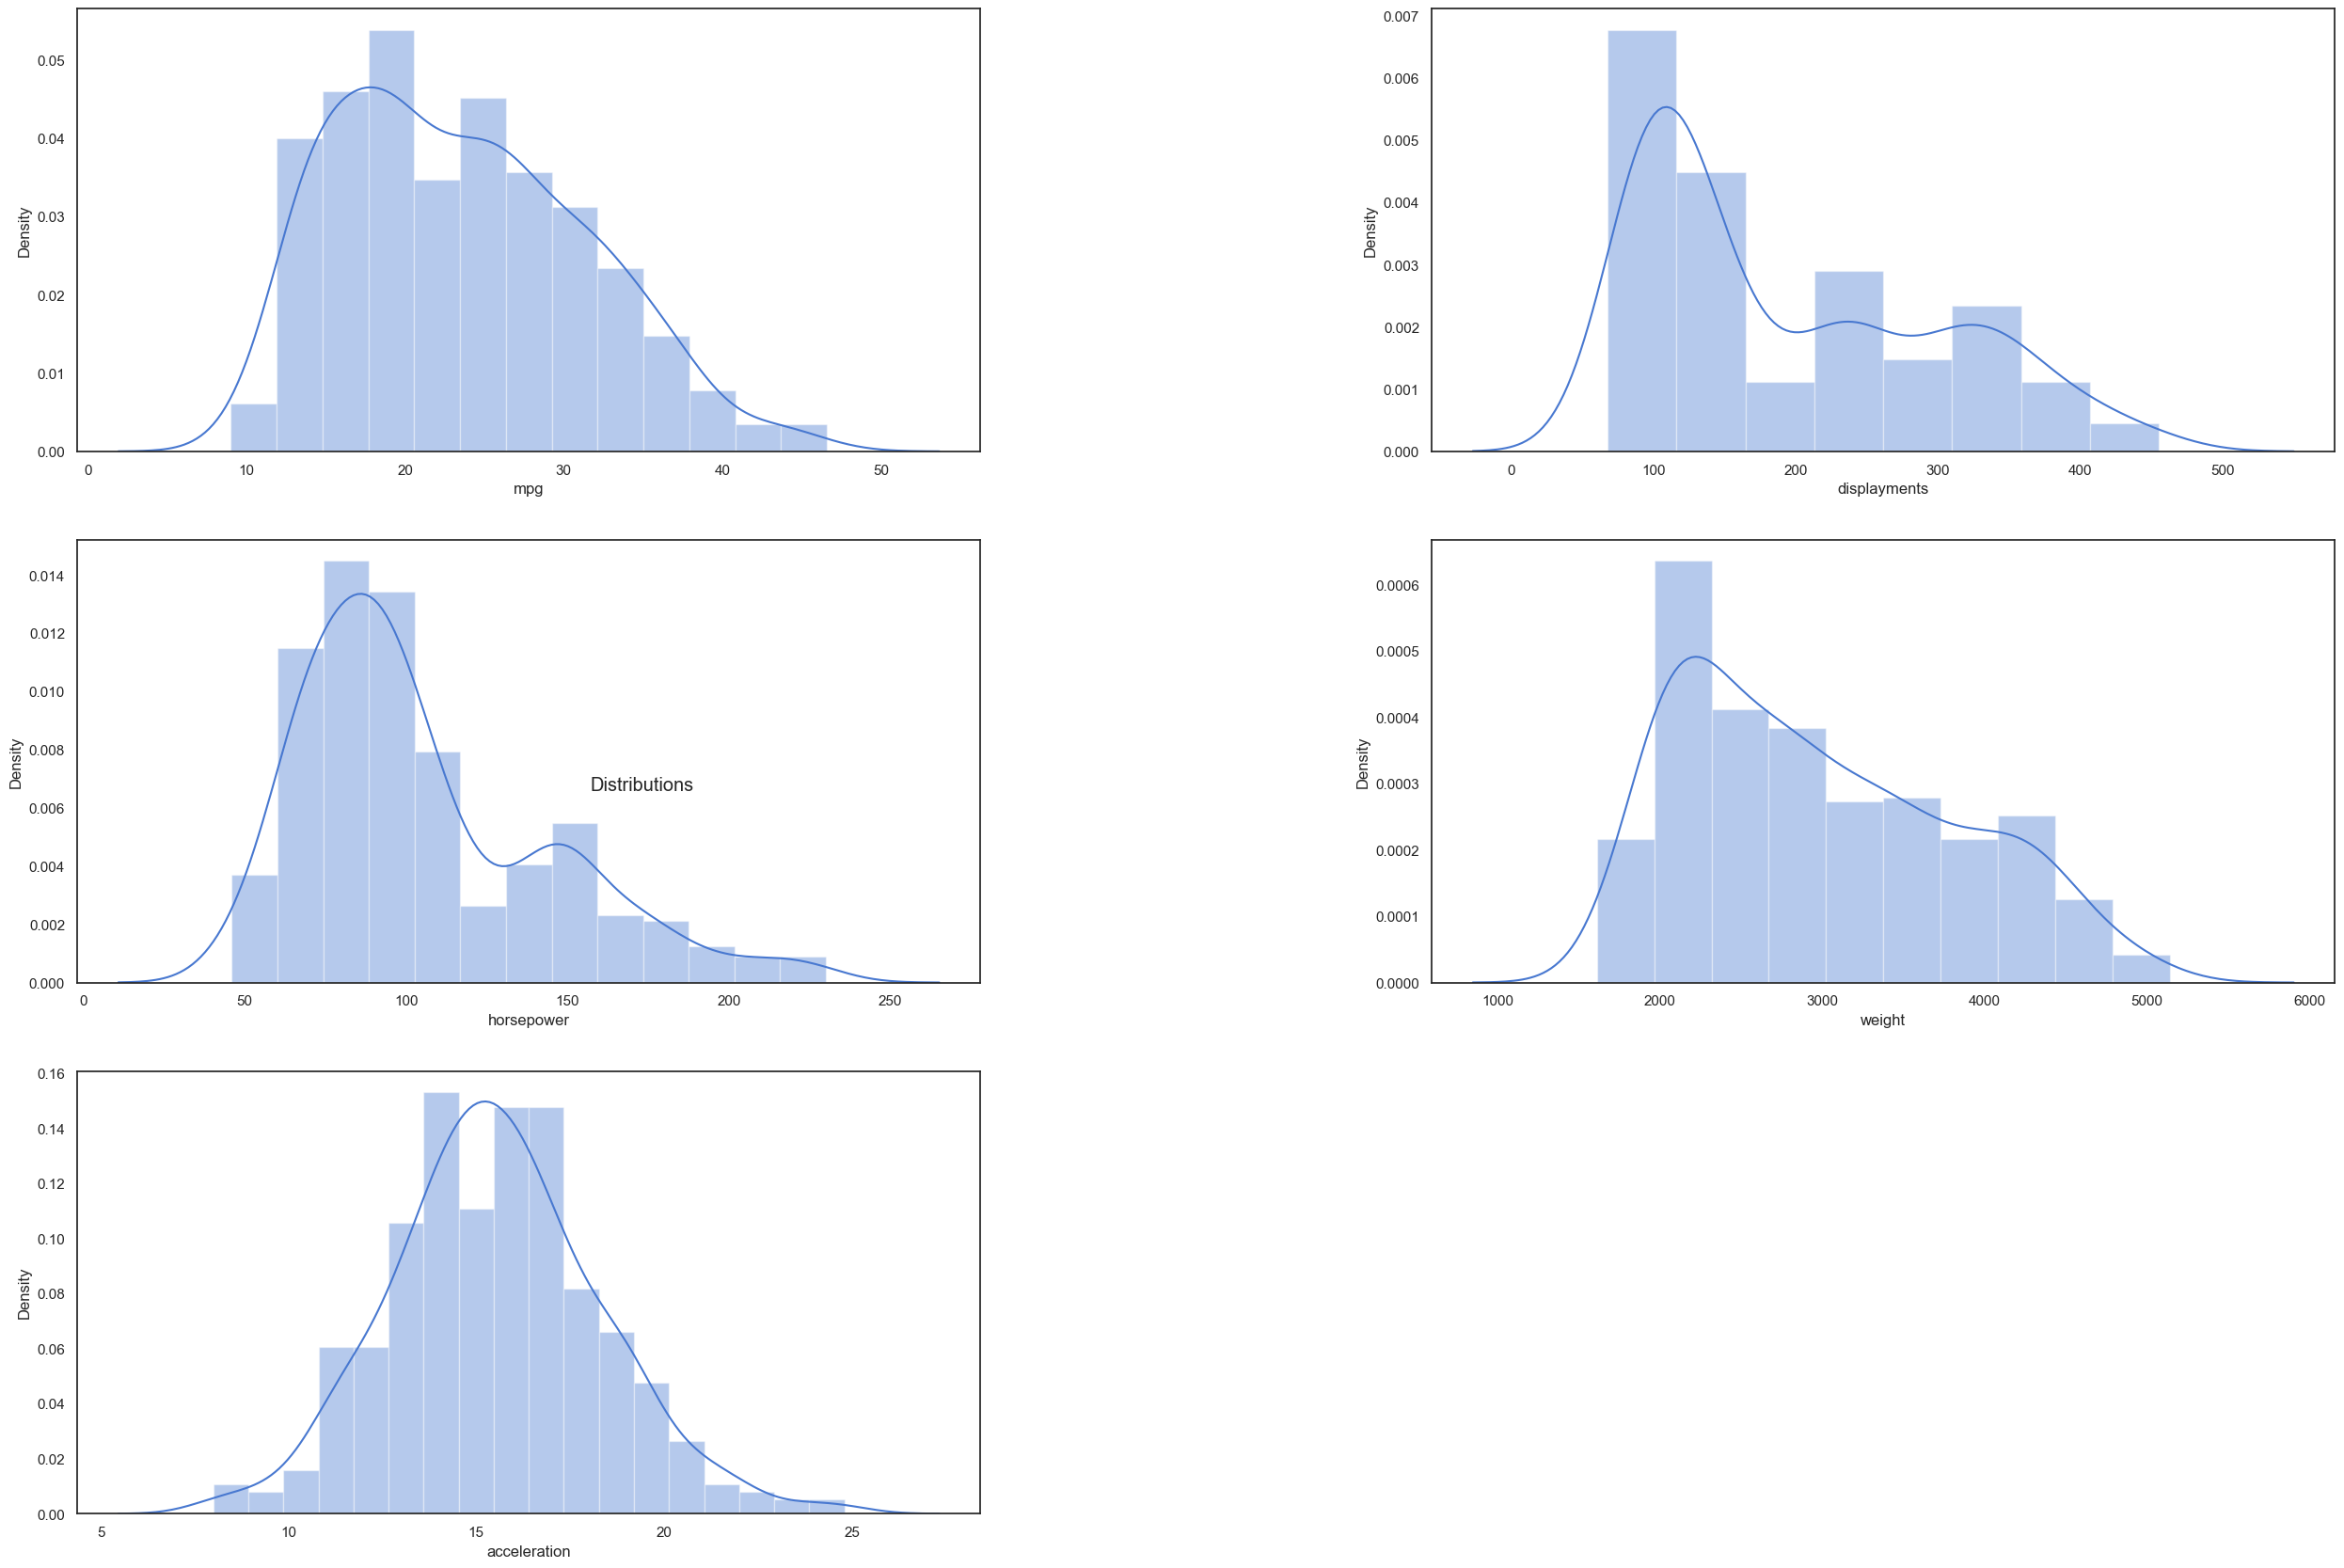

<Figure size 10000x10000 with 0 Axes>

In [20]:
#Subplots τα distplots
inspectKeys = ['mpg', 'displayments', 'horsepower', 'weight', 'acceleration']

fig, axes = plt.subplots(nrows=3,ncols=2)
fig.suptitle('Distributions')
for (index, fieldName) in enumerate(inspectKeys):
    row = index // 2
    col = index % 2
    axis = axes[row,col]
    sns.distplot(df[fieldName], ax=axis)
fig.delaxes(axes[2][1])

fig.subplots_adjust(left=0, bottom=0, right=2, top=2, wspace=0.5, hspace=0.2)
plt.figure(figsize=(100,100))
plt.show()

In [21]:
df.describe()
#To describe στο model year δεν εχει ιδιαίτερη χρησιμότητα 

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## Categorical features

In [22]:
df.describe(include='object')

,origin,car name
count,406,406
unique,3,312
top,1,ford pinto
freq,254,6


In [23]:
df[df['car name'] == 'ford pinto']
# Για ποιό λόγο 6 ίδια αυτοκίνητα έχουν διαφορετικά χαρακτηριστικά;
# Έχουν διαφορετικό έτος παραγωγής, άρα είναι 6 διαφορετικά αυτοκίνητα.
# Πιθανότατα για εχει μοναδικότητα το κάθε αμάξι θα έπρεπε να κάνω aggregation car name με model year.

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name
38,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
119,19.0,4,122.0,85.0,2310,18.5,73,1,ford pinto
137,26.0,4,122.0,80.0,2451,16.5,74,1,ford pinto
175,23.0,4,140.0,83.0,2639,17.0,75,1,ford pinto
181,18.0,6,171.0,97.0,2984,14.5,75,1,ford pinto
213,26.5,4,140.0,72.0,2565,13.6,76,1,ford pinto


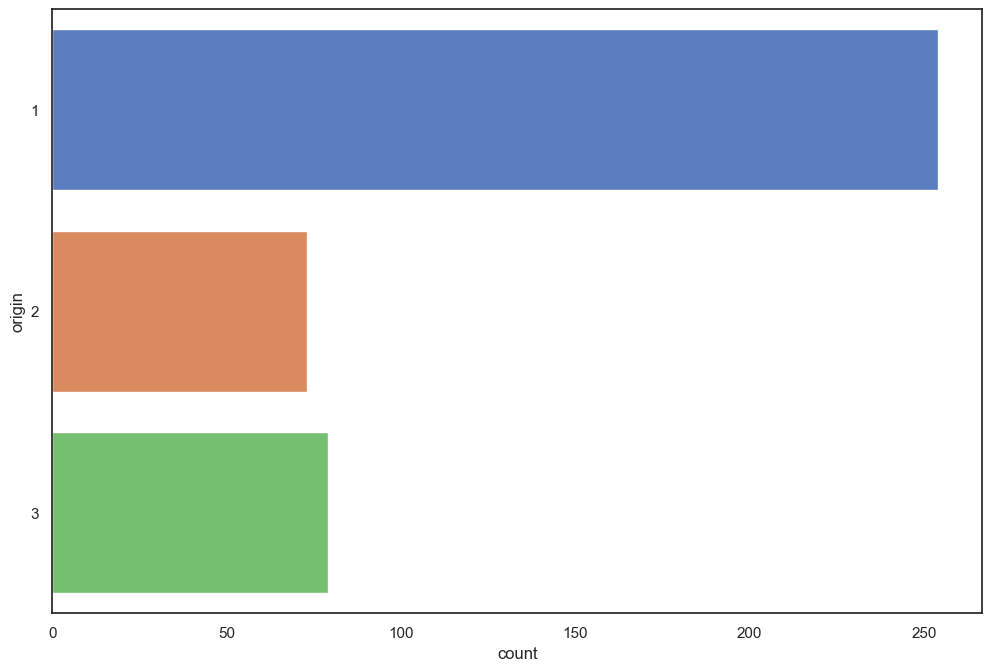

In [24]:
# Η πλειοψηφία των αυτοκινήτων μου προέρχεται απο το origin 1 ( Ευρώπη )
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 10:
        sns.countplot(y=column, data=df)
        plt.show()

## Grouping and segmentation 

In [25]:
pd.pivot_table(df, index='origin', columns='cylinders', values='mpg')
# Παρατηρούμε ότι υπάρχουν μονο αυτοκίνητα 3 και 5 cylinders στο origin 1,
# 3 και 8 cylinders στο origin 2, 5 και 8 cylinders στο origin 3

cylinders,3,4,5,6,8
origin,,,,,
1,NaN,27.840278,NaN,19.663514,14.963107
2,NaN,28.411111,27.366667,20.100000,NaN
3,20.55,31.595652,NaN,23.883333,NaN


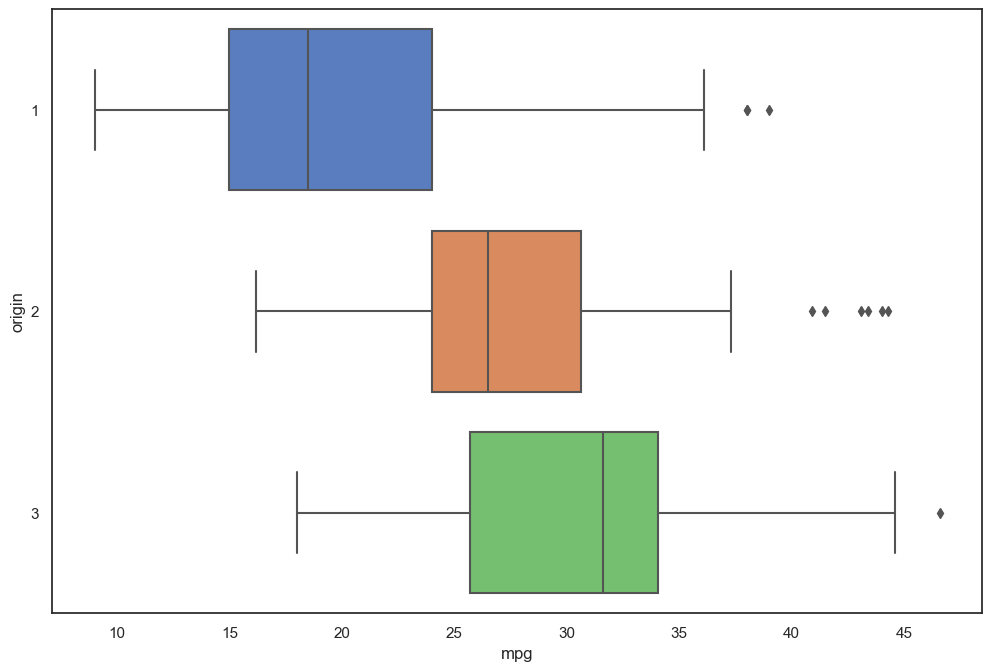

In [26]:
#Παρατηρείται παρακάτω ότι φαίνεται το μέρος προέλευσης να επηρεάζει το mpg
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 10:
        sns.boxplot(y=column, x='mpg', data=df)
plt.show()

In [27]:
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 10:
        display(df.groupby(column).mean())

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year
origin,,,,,,,
1,20.083534,6.283465,247.935039,119.900000,3372.700787,14.942520,75.500000
2,27.891429,4.150685,109.465753,81.000000,2431.493151,16.821918,75.739726
3,30.450633,4.101266,102.708861,79.835443,2221.227848,16.172152,77.443038


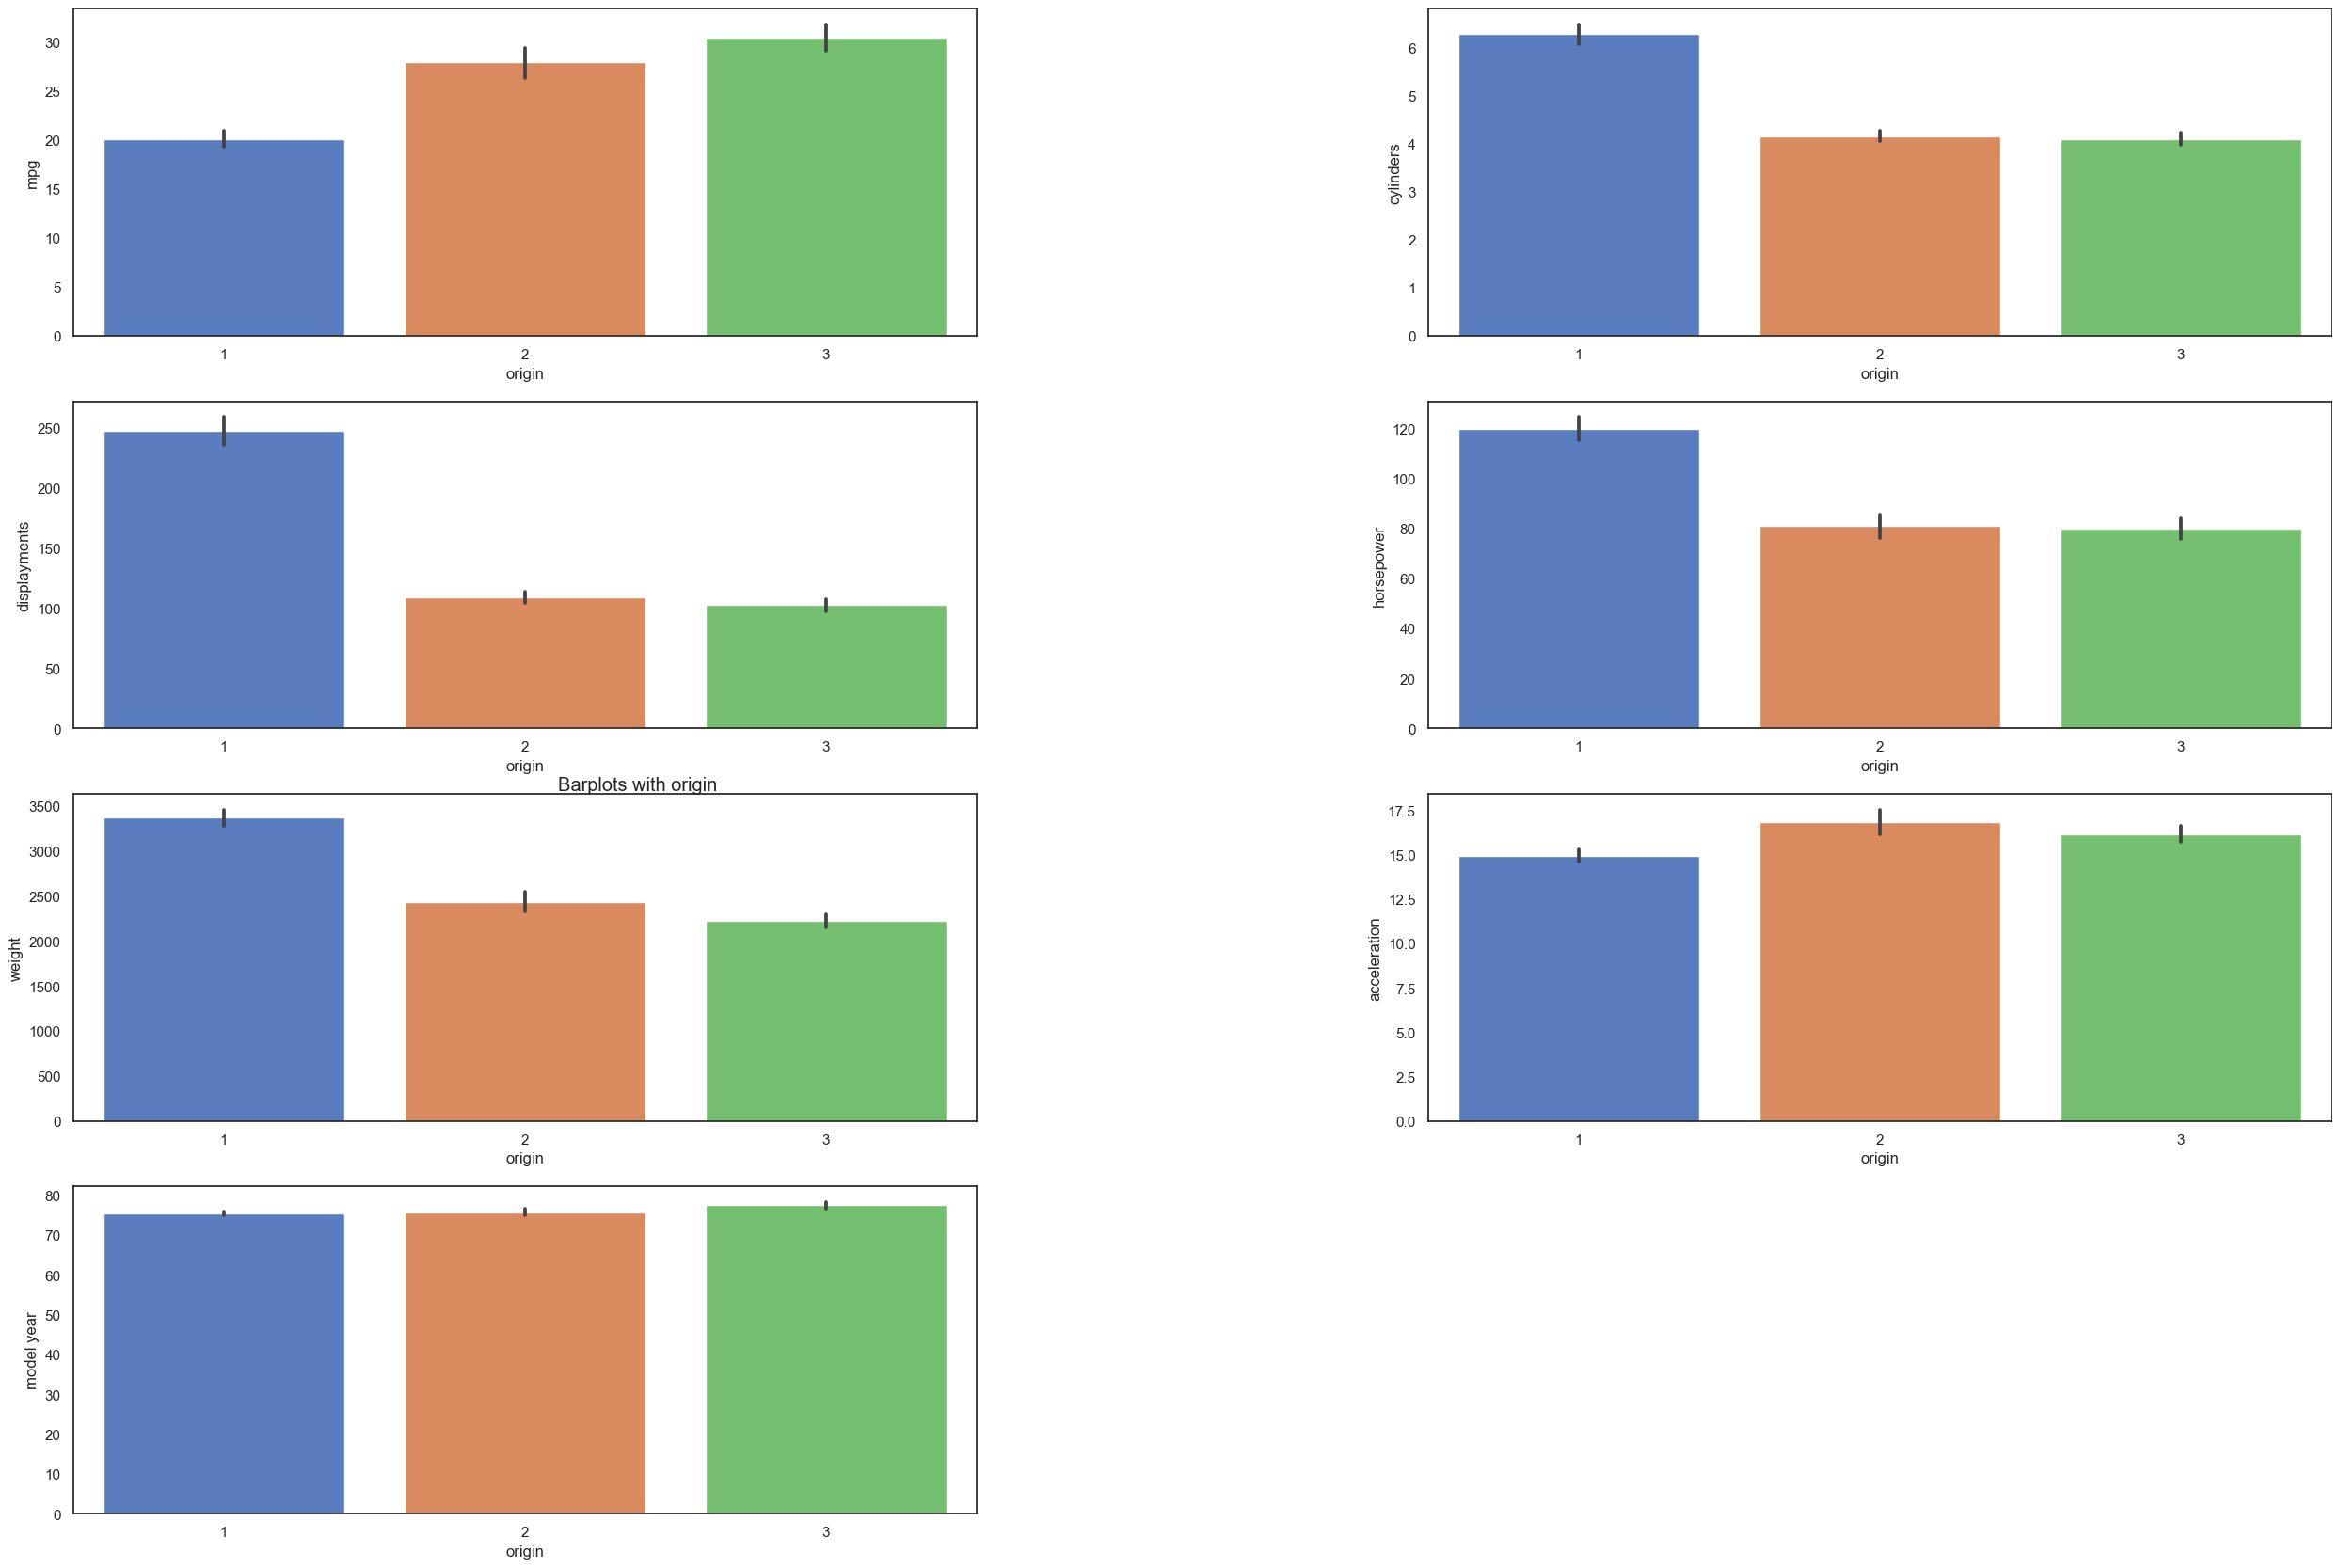

In [28]:
#Barplots με origin
inspectKeys = ['mpg', 'cylinders', 'displayments', 'horsepower', 'weight', 'acceleration', 'model year']

fig, axes = plt.subplots(nrows=4,ncols=2)
fig.suptitle('Barplots with origin')
for (index, fieldName) in enumerate(inspectKeys):
    row = index // 2
    col = index % 2
    axis = axes[row,col]
#sns.histplot(df[fieldName], ax=axis)
    sns.barplot(y=fieldName, x='origin', data=df, ax=axis)
fig.delaxes(axes[3][1])
fig.subplots_adjust(left=0, bottom=0, right=2, top=2, wspace=0.5, hspace=0.2)
plt.show()

## Relationships between numeric features and other numeric features

In [29]:
corelation = df.corr()
corelation

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.951787,0.844158,0.895220,-0.522452,-0.360762
displayments,-0.804203,0.951787,1.000000,0.898326,0.932475,-0.557984,-0.381714
horsepower,-0.778427,0.844158,0.898326,1.000000,0.866586,-0.697124,-0.424419
weight,-0.831741,0.895220,0.932475,0.866586,1.000000,-0.430086,-0.315389
acceleration,0.420289,-0.522452,-0.557984,-0.697124,-0.430086,1.000000,0.301992
model year,0.579267,-0.360762,-0.381714,-0.424419,-0.315389,0.301992,1.000000


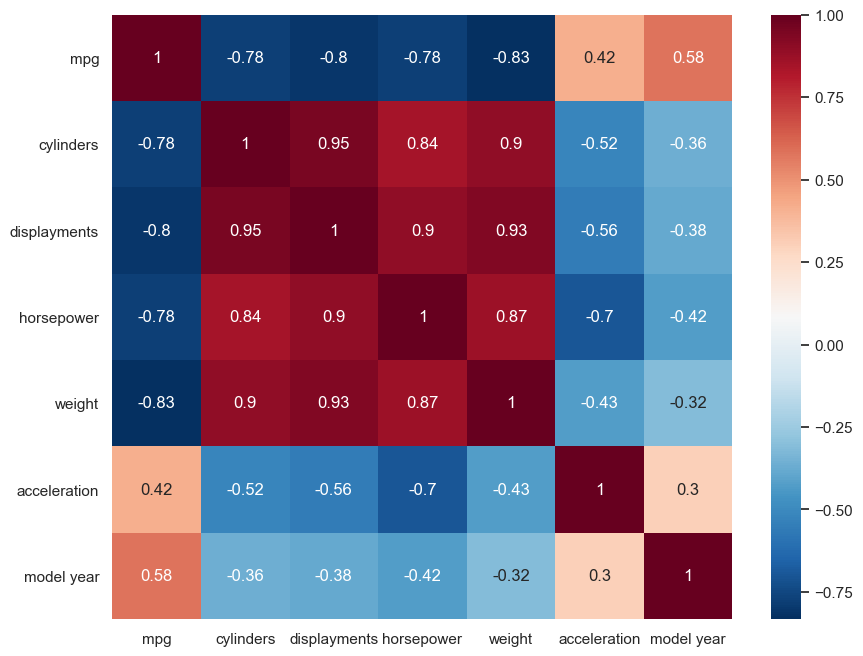

In [30]:
#sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)
# είτε δείτε και το (διαφορά αισθητική μόνο)
plt.figure(figsize=(10,8))
sns.heatmap(corelation, cmap='RdBu_r', annot=True)
plt.show()
# Βλέπουμε τα correlations μεταξύ των μεταβλητών. Είναι φανερό ότι πολλές μεταβλητές έχουν
# σημαντικά correlations. Το mpg σε πρ΄ώτη ματιά συσχετίζεται με cylinders,displayment και horsepower

### Multivariable 

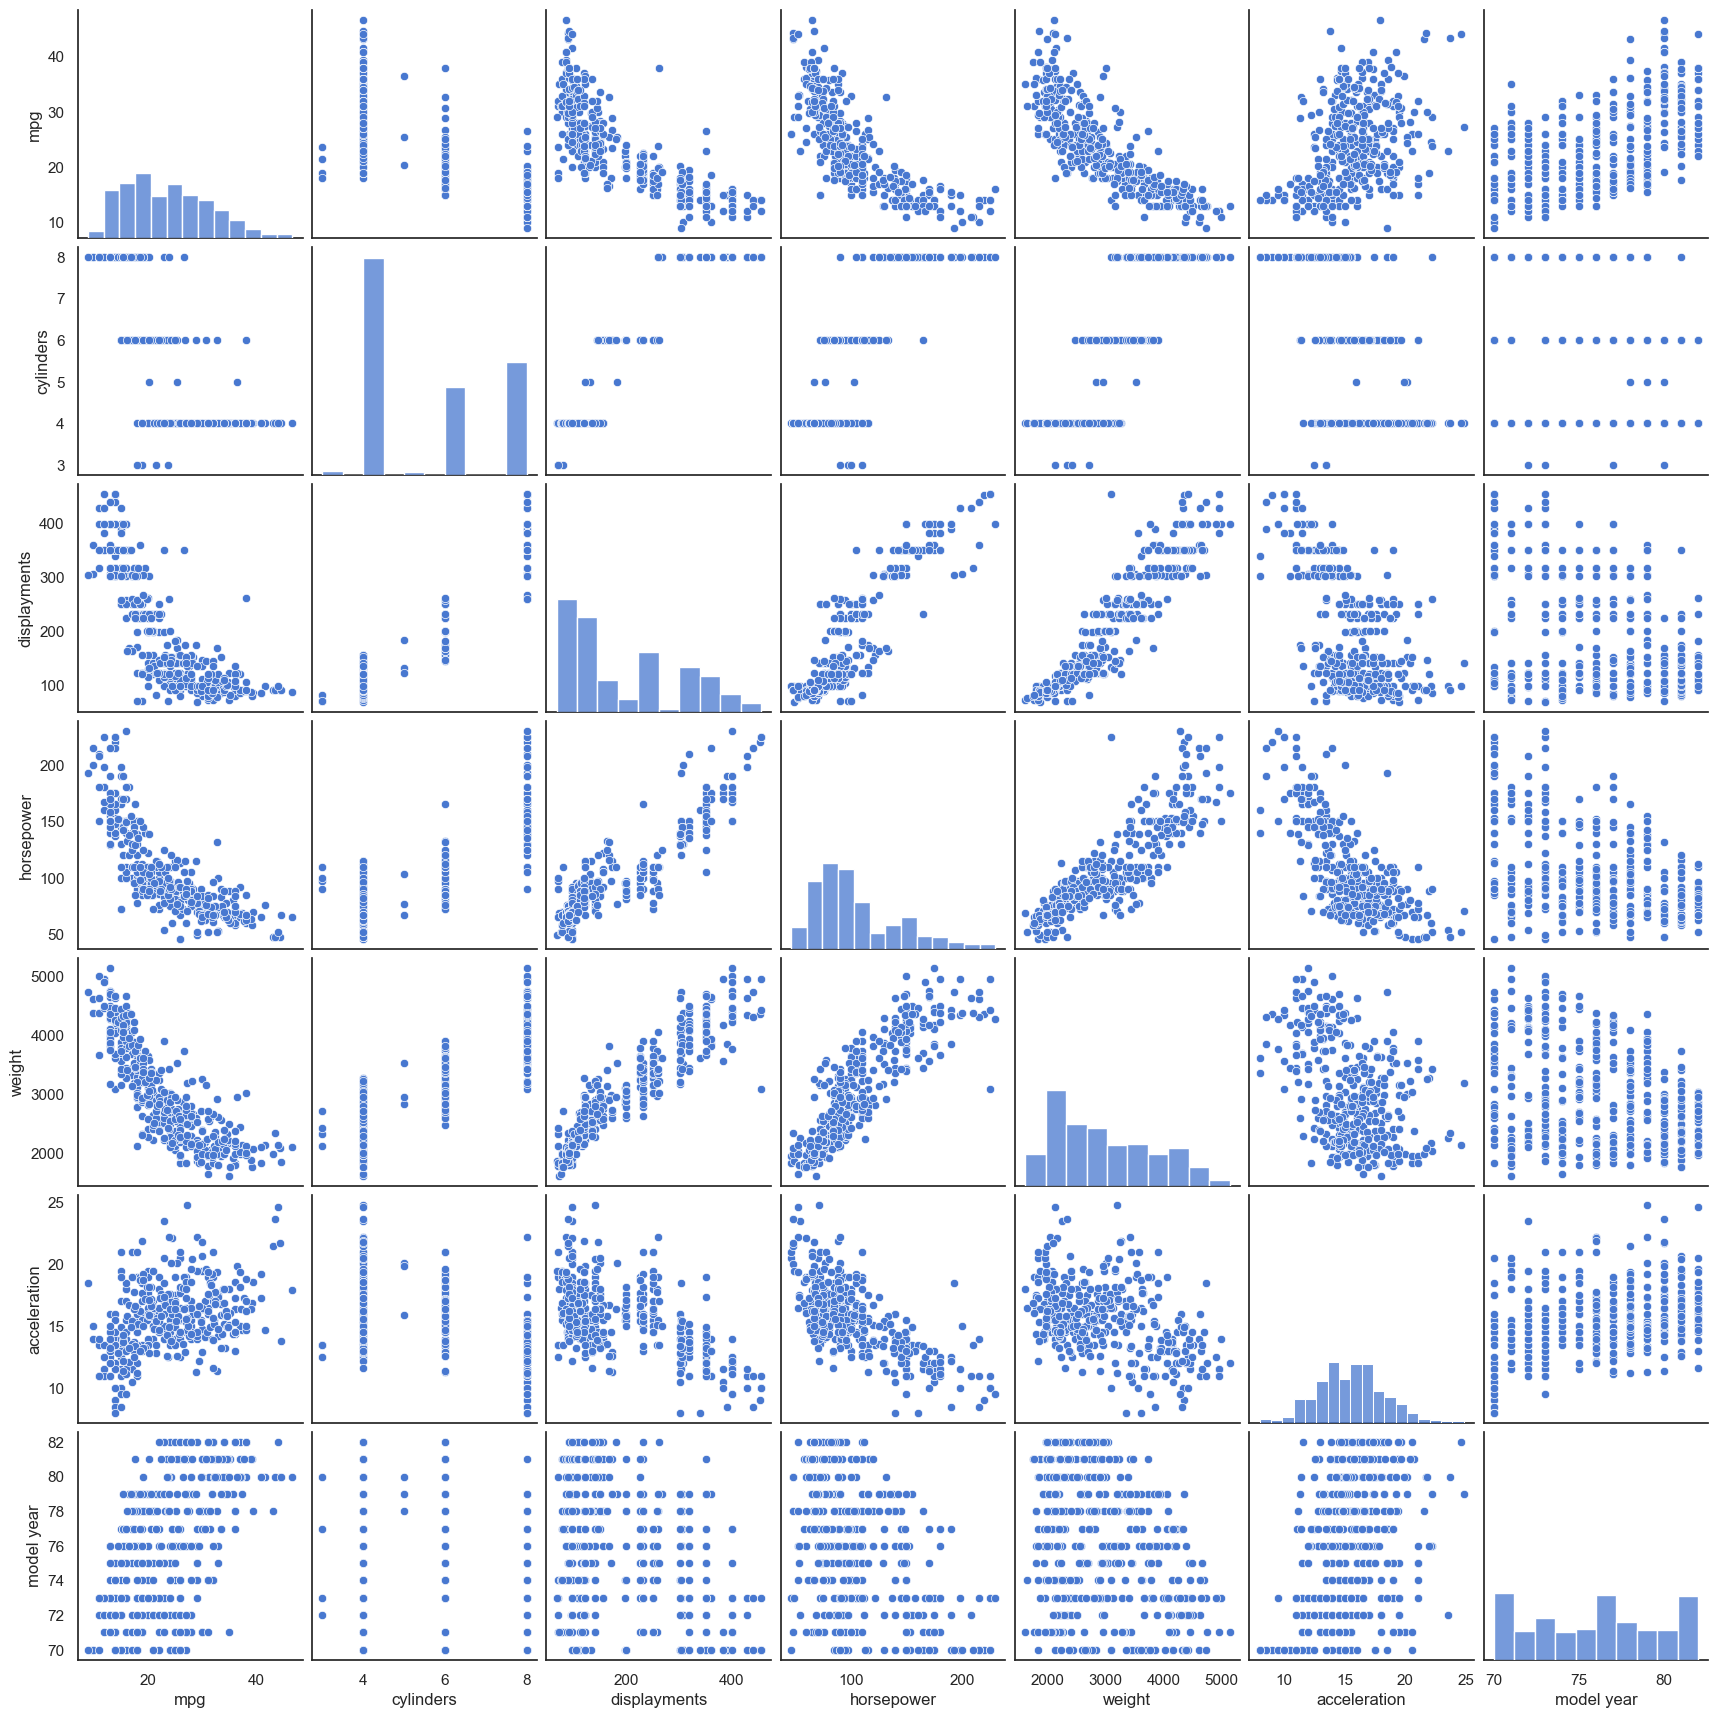

In [31]:
sns.pairplot(df)
plt.show()
# overview όλων των pairplots για να εντοπίσουμε τα πιο relevant

c:\users\ezet\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='horsepower', ylabel='displayments'>

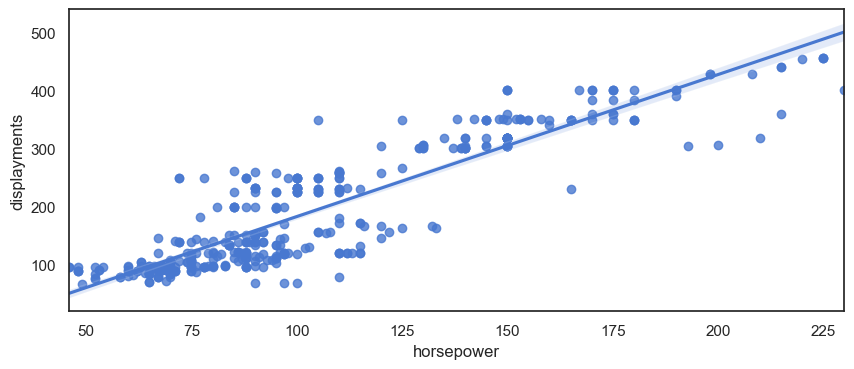

In [32]:
plt.figure(figsize=(10, 4))
sns.regplot('horsepower', 'displayments', data=df)
# Illustration του γραμμικού regression μεταξύ displayments και horsepower


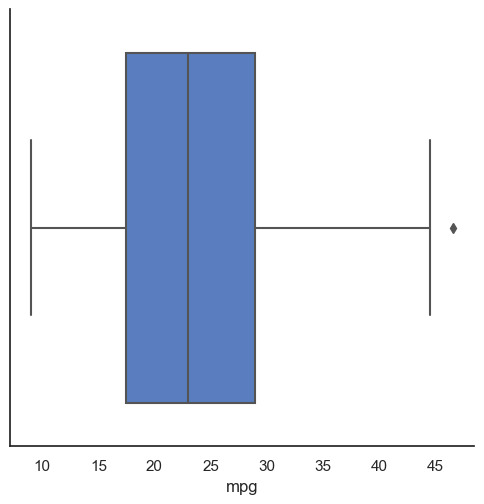

In [33]:
#Cat plot για το mpg 
sns.catplot(x='mpg', kind = 'box', data = df)

In [34]:
df1 = df [['mpg','cylinders','origin']]
df1['cylinders'].replace({3: 4, 5: 6}, inplace=True)
df1

c:\users\ezet\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,mpg,cylinders,origin
0,18.0,8,1
1,15.0,8,1
2,18.0,8,1
3,16.0,8,1
4,17.0,8,1
...,...,...,...
401,27.0,4,1
402,44.0,4,2
403,32.0,4,1
404,28.0,4,1


<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

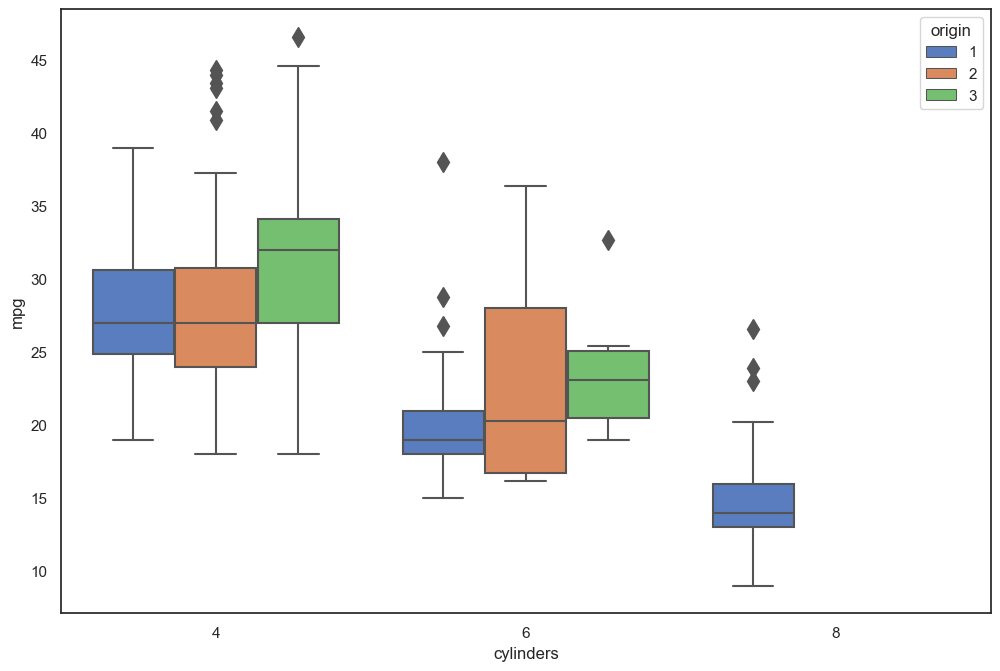

In [35]:
sns.boxplot(x='cylinders', y='mpg', hue='origin', data=df1,fliersize=10)
# Boxplot των mpg ανά origin, ανά αριθμό κυλίνδρων. 

# Clusters Experiments

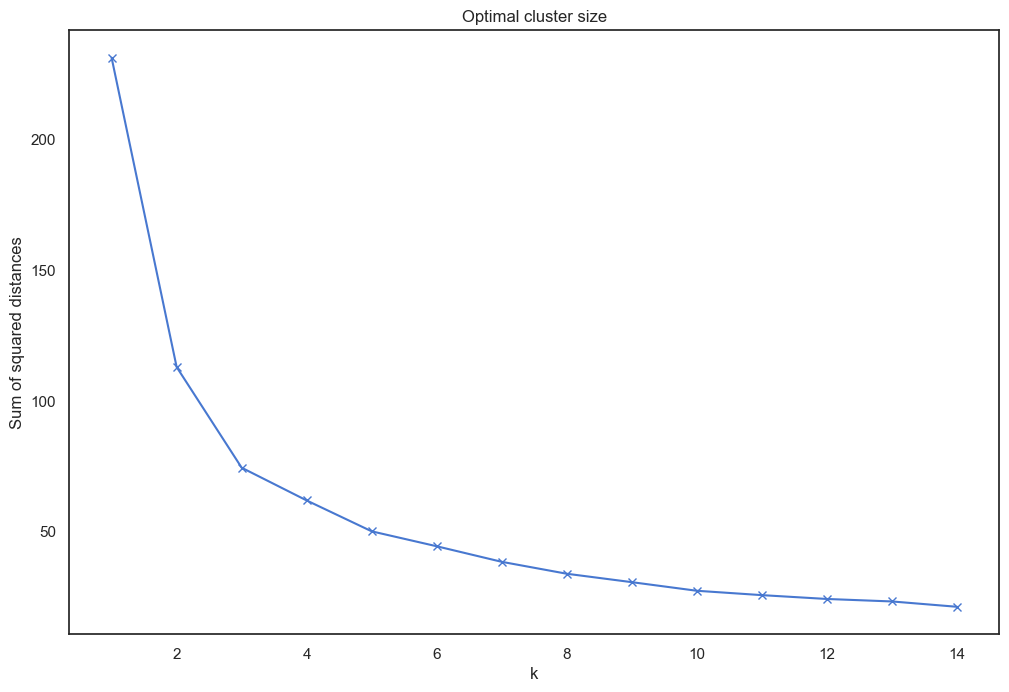

In [36]:
# Θα κάνουμε έναν έλεγχο για να δούμε αν υπάρχουν clusters στα data
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# ορίζω το seed μου
np.random.seed(0)

# Διώχνουμε το car name
dfC = df[['cylinders','displayments','horsepower','weight','acceleration','model year','origin']]
#κάνουμε drop τα NA. Αν αποφασίσουμε να διατηρήσουμε το clustering θα επιστρέψουμε σε αυτό το θέμα
dfC = dfC.dropna()
# origin σε αιρθμούς εδώ μεσα στο dfC 
dfC['origin'] = dfC['origin'].astype('int')
# θα χρειαστούμε κανονικοποίηση
mms = MinMaxScaler()
mms.fit(dfC)
data_transformed = mms.transform(dfC)

# υπολογισμός στα sum of squared distances και εύρεση του optimal k
sum_of_squared_distances = []
clusterRange = range(1, 15)
for k in clusterRange:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    sum_of_squared_distances.append(km.inertia_)

# Visualization του τελευταιου
plt.plot(clusterRange, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Optimal cluster size')
plt.show()

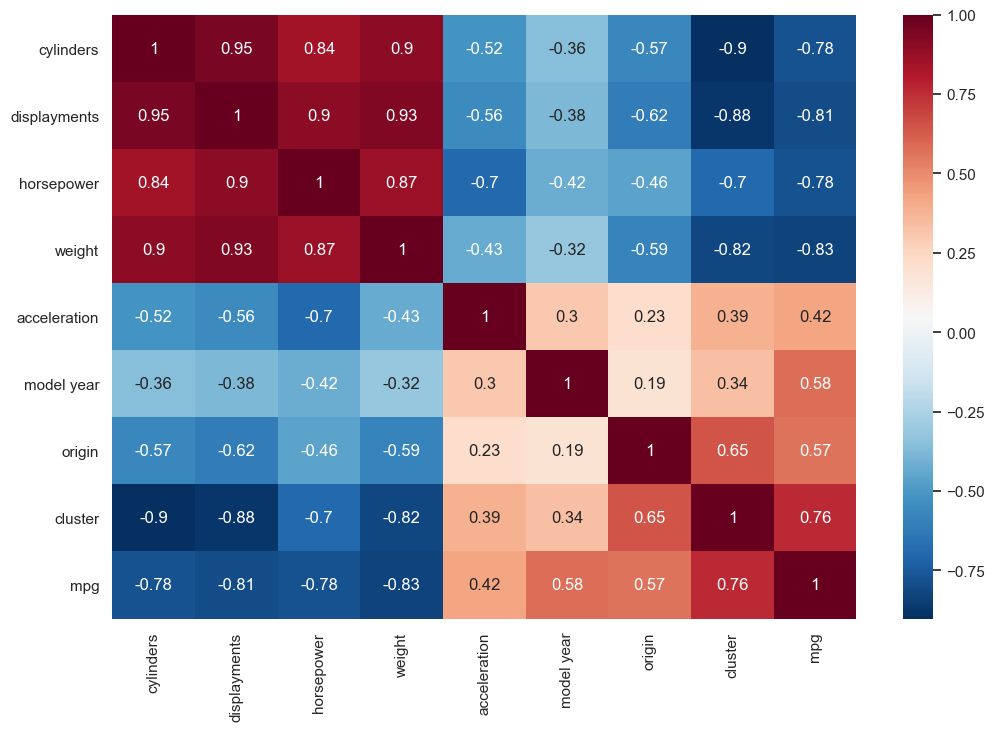

In [37]:
# Παρατηρήσεις
# με n_clusters=3 βρίσκει σχεδόν το origin!!!
# με n_clusters=2 έχει καλό correlation με τα υπόλοιπα και πολύ καλή με mpg!!!

km = KMeans(n_clusters=2)
km = km.fit(data_transformed)

dfC['cluster'] = km.fit_predict(data_transformed)
dfC['mpg'] = df['mpg'].dropna()
plt.figure()
sns.heatmap(dfC.corr(), cmap='RdBu_r', annot=True)
plt.show()

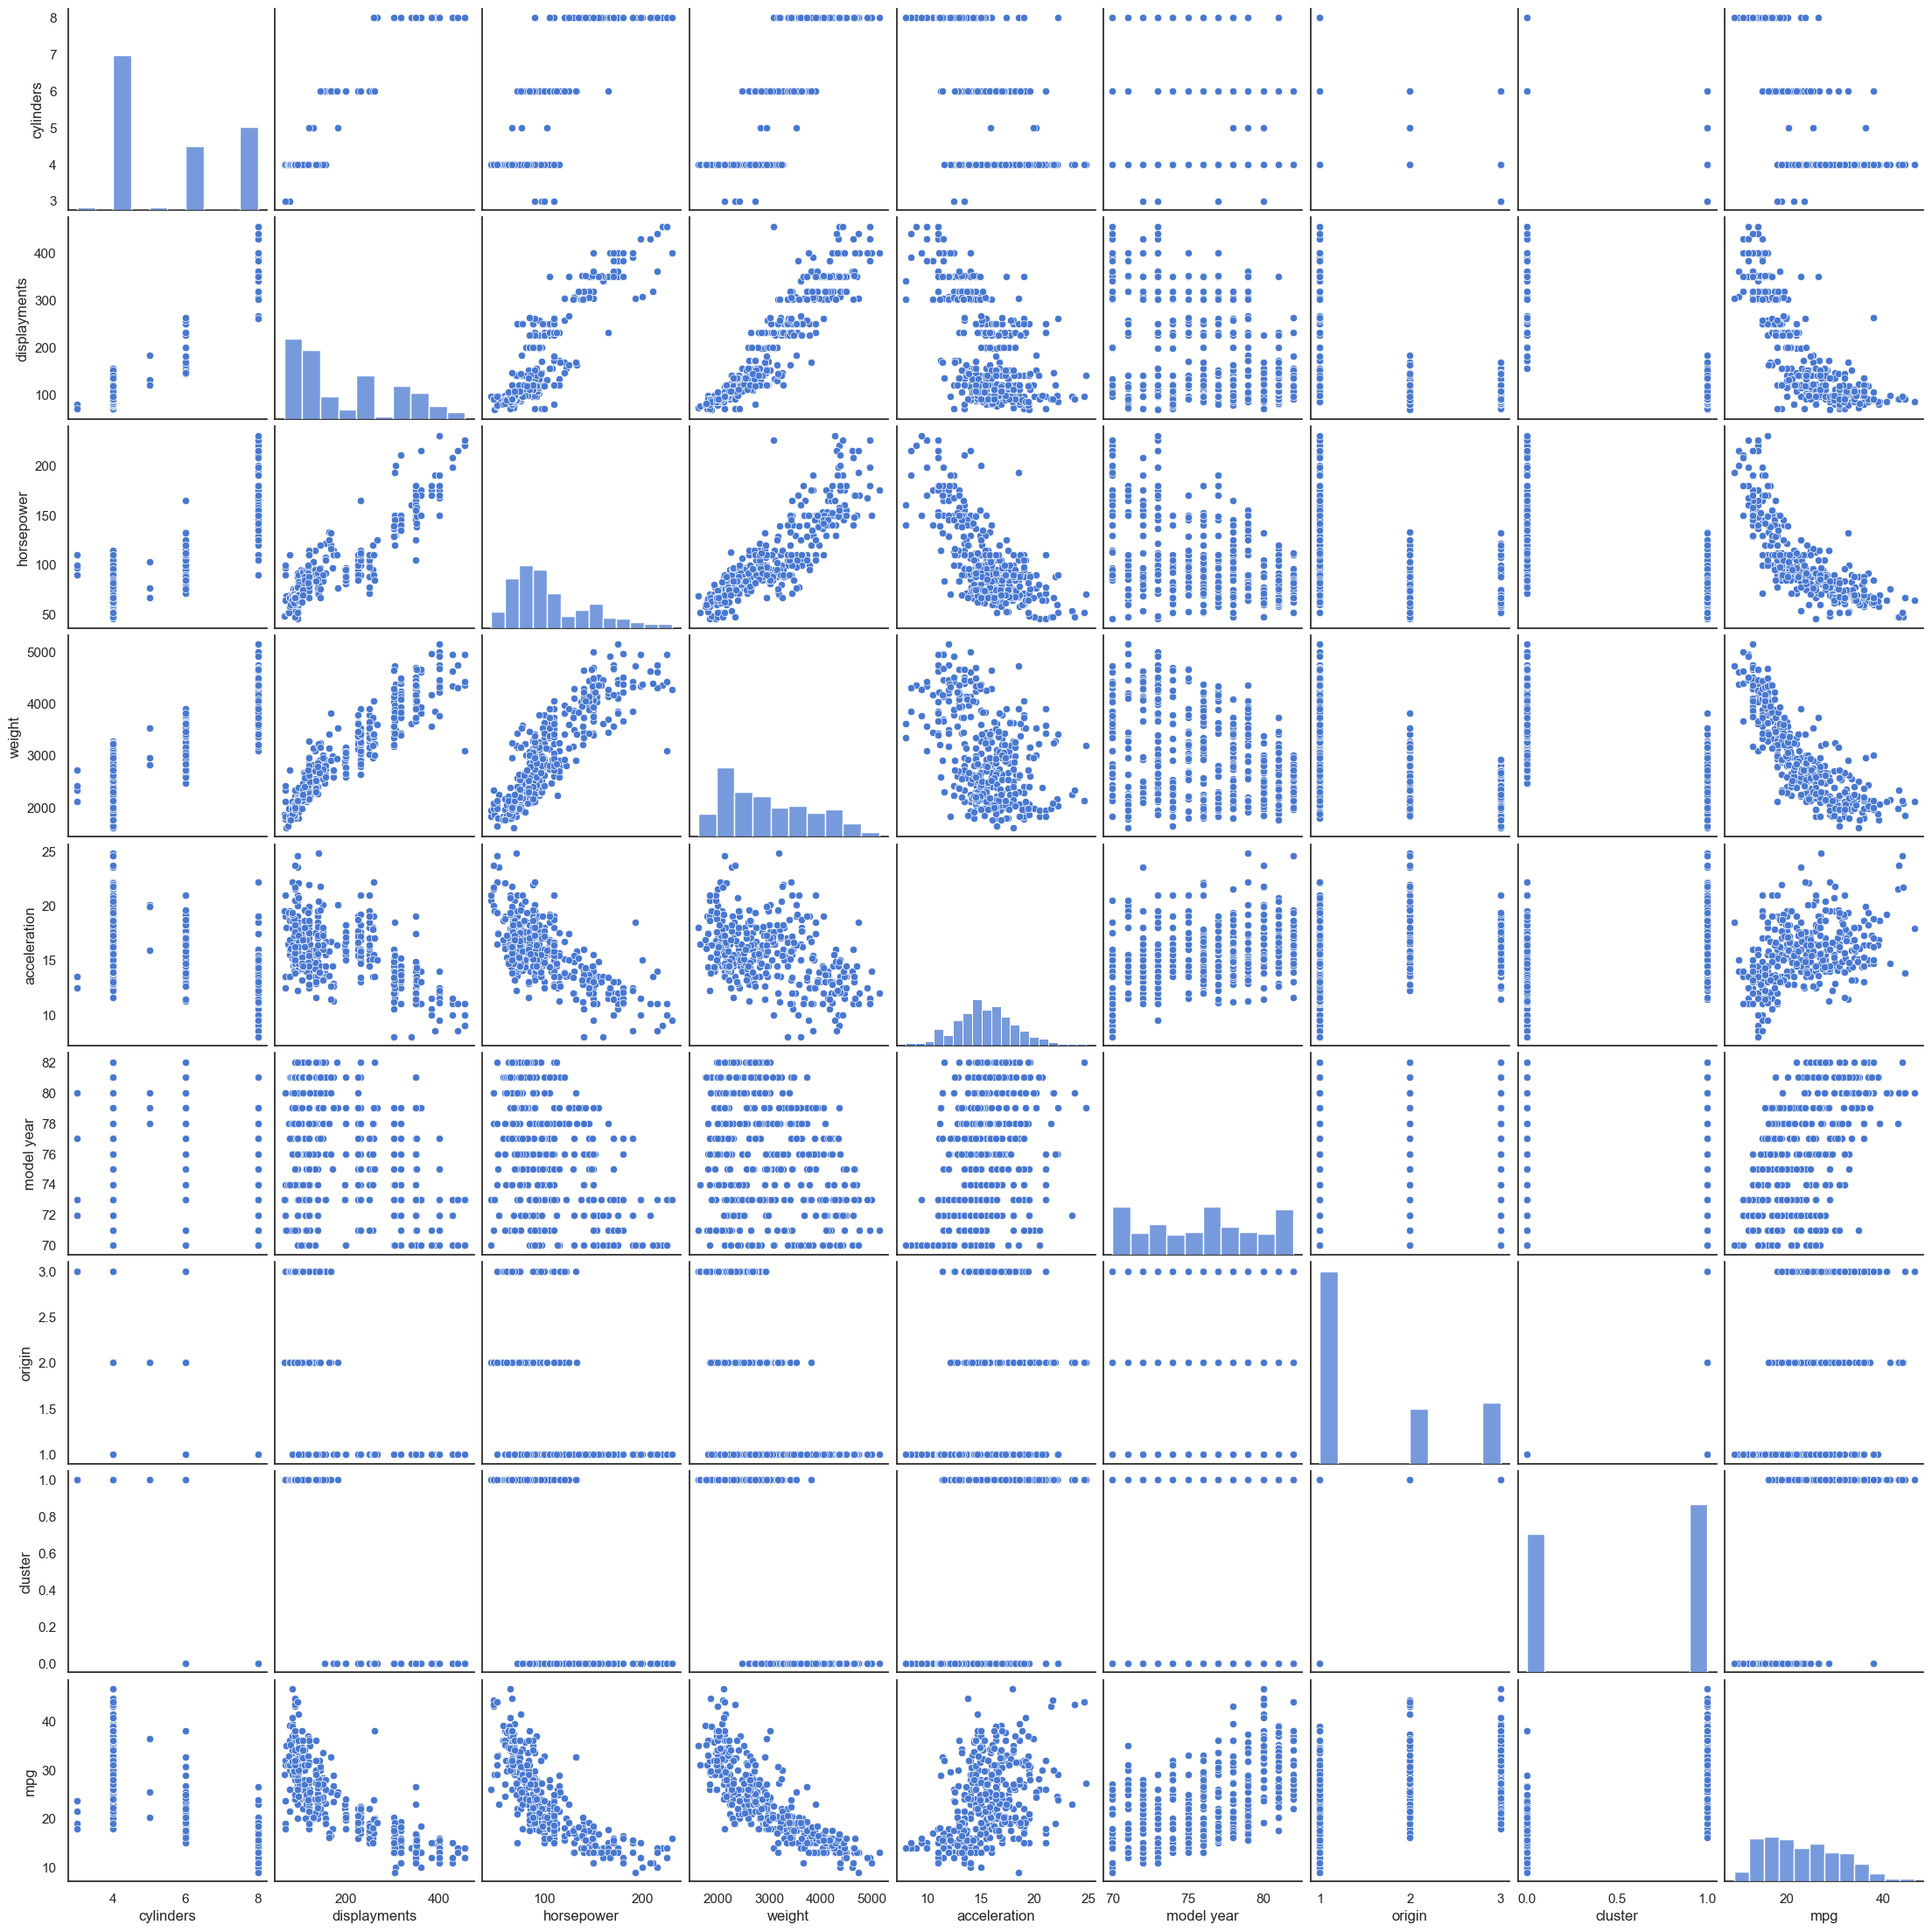

In [38]:
sns.pairplot(dfC)
plt.show()

2


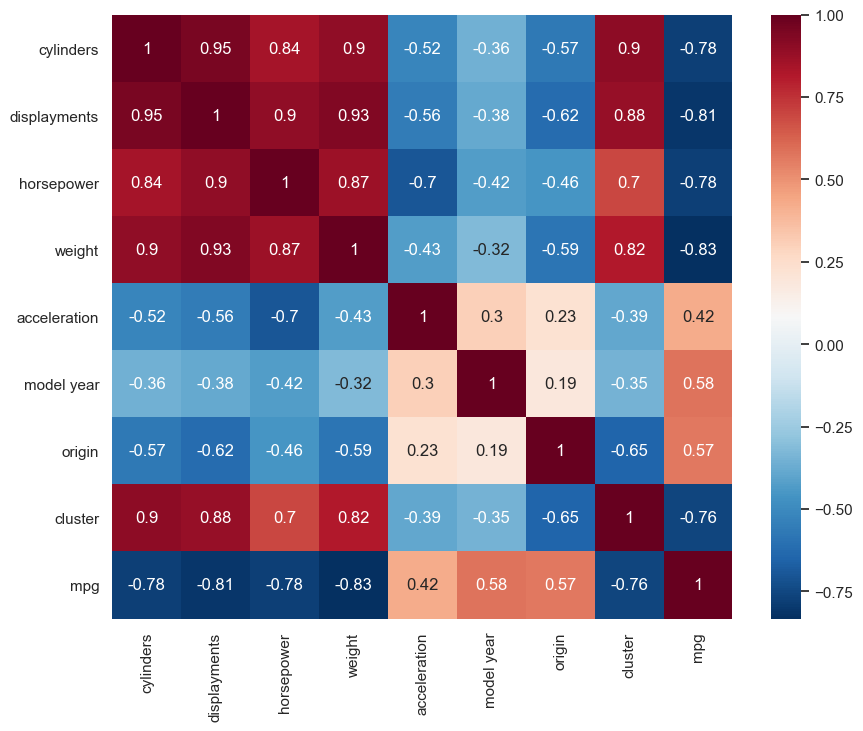

In [39]:
# MeanShift Cluster exploration
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html
# βρίσκει ότι όντως το optimal cluster size = 2
from sklearn.cluster import MeanShift

cluster = MeanShift()
cluster = cluster.fit(data_transformed)

n_clusters_ = len(cluster.cluster_centers_)
print(n_clusters_)

dfC['origin'] = dfC['origin'].astype('int')
dfC['cluster'] = cluster.fit_predict(data_transformed)
plt.figure(figsize=(10,8))
sns.heatmap(dfC.corr(), cmap='RdBu_r', annot=True)
plt.show()

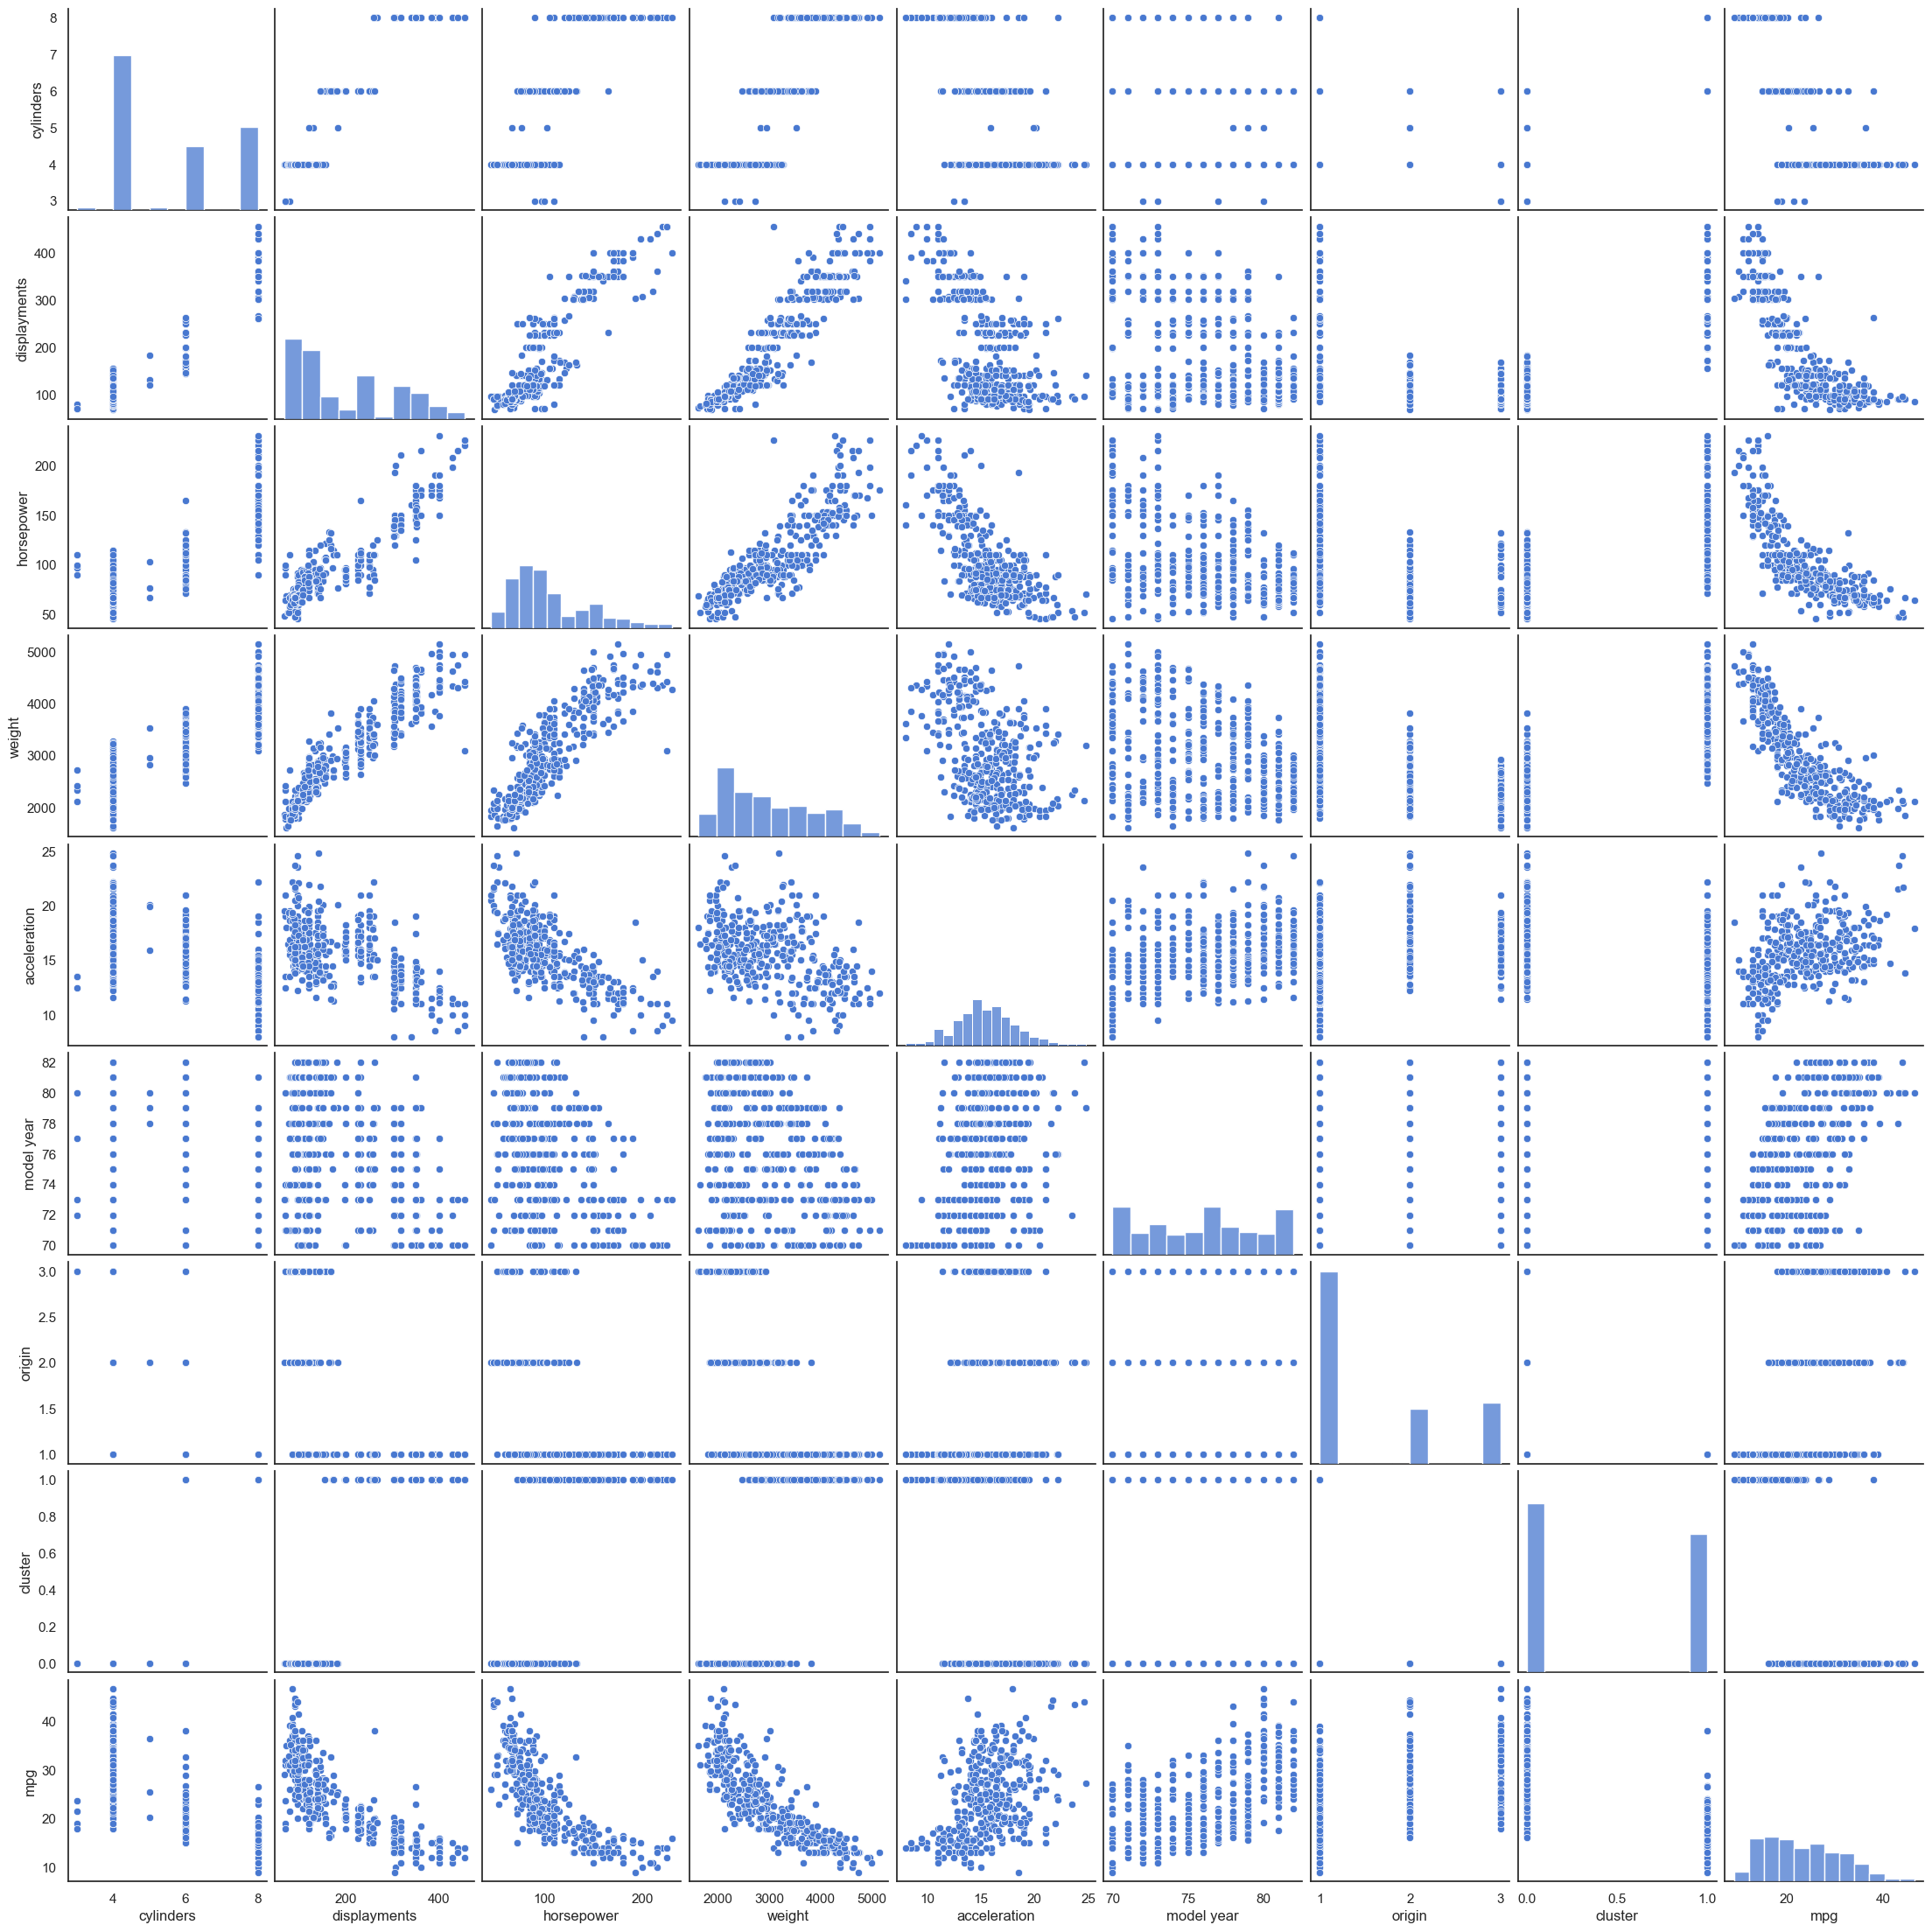

In [40]:
sns.pairplot(dfC)
plt.show()

<AxesSubplot:xlabel='cluster', ylabel='mpg'>

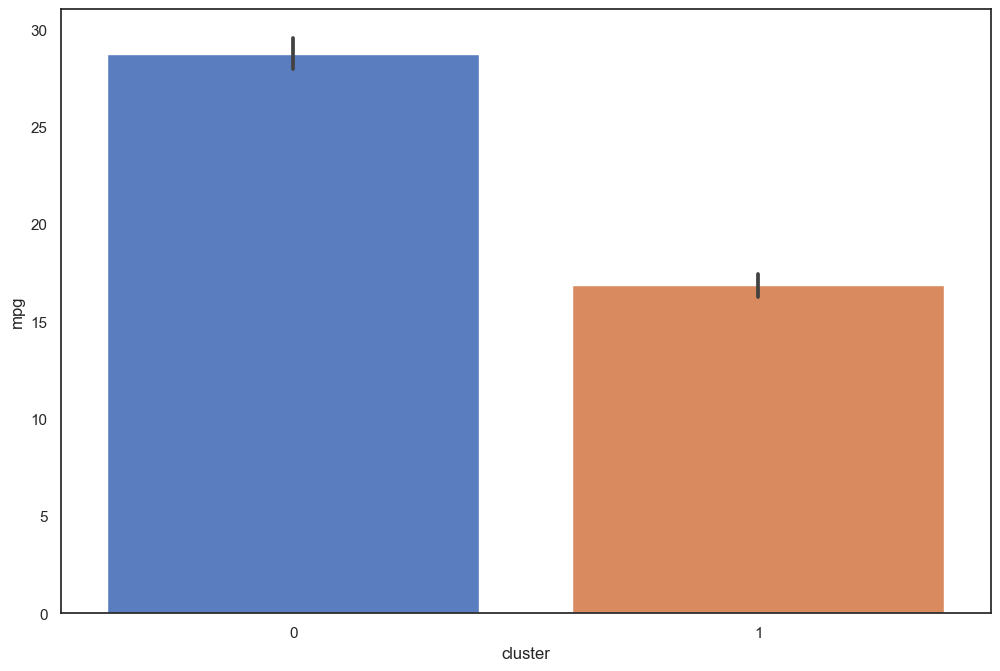

In [41]:
sns.barplot(y='mpg', x='cluster',  data=dfC)

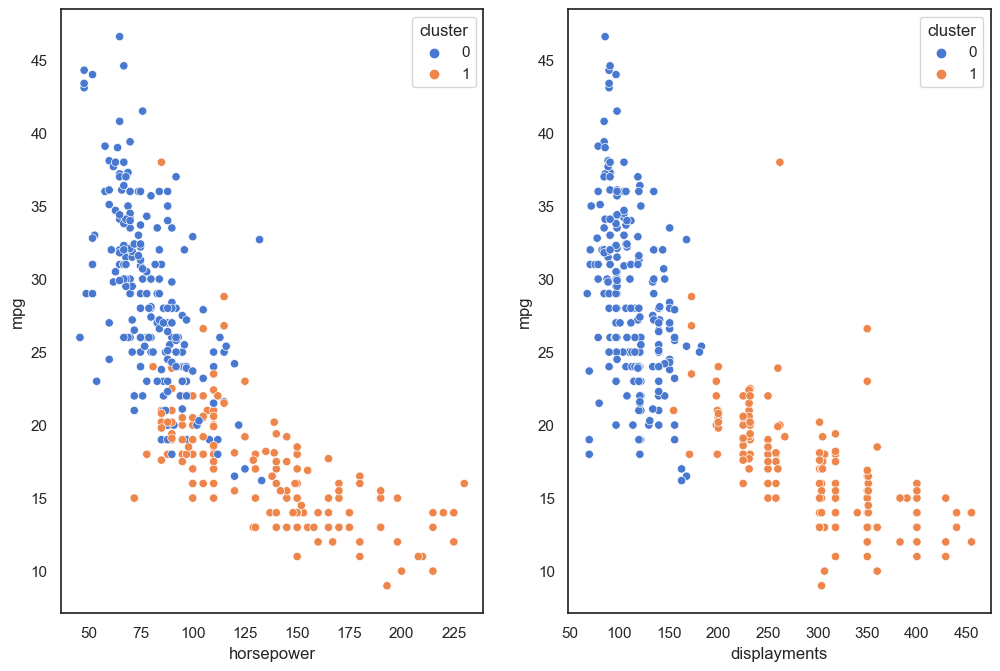

In [42]:
fig, axes = plt.subplots(1,2)

sns.scatterplot(ax=axes[0], x='horsepower', y= 'mpg', hue = 'cluster', data=dfC)
sns.scatterplot(ax=axes[1], x='displayments', y= 'mpg', hue = 'cluster', data=dfC)
    
plt.show()

## Extracting words out of column: car name

In [43]:
# extract car brands from car name
def getBrand(x):
    brand = x.lower().split()[0]
    return brand
df['brand'] = df['car name'].map(getBrand)

In [44]:
df

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name,brand
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,ford
402,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,vw
403,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,dodge
404,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,ford


In [45]:
# δημιουργία bag of words από brands με στόχο την εύρεση τυπογραφικών
bagOfWords = {}
for name in df['brand']:
    words = name.lower().replace('(', '').replace(')', '').split()
    for word in words:
        if word not in bagOfWords:
            bagOfWords[word] = 0
        bagOfWords[word] += 1

In [46]:
# χρησιμοποιούμε ώστε να βρούμε τα τυπογραφικά
matchStrictness = 0.7
foundWords = []
for word in bagOfWords:
    for altWord in bagOfWords:
        if word in foundWords or altWord in foundWords:
            continue
        if word.isdigit() or altWord.isdigit():
            continue
        if word == altWord:
            continue
        similarity = SequenceMatcher(None, word, altWord)
        if similarity.ratio() > matchStrictness:
            foundWords.append(word)
            foundWords.append(altWord)
            print(f'{word} - {altWord}')

chevrolet - chevroelt
toyota - toyouta
volkswagen - vokswagen
mazda - maxda
mercedes-benz - mercedes


In [47]:
# Εφόσον το dataset είναι πολύ μικρό μπορούμε και χειροκίνητα
df['brand'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'citroen', 'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot',
       'audi', 'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [48]:
# διόρθωση της brand name column
def getBrand(x):
    brand = x.lower().split()[0]
    if (brand == 'vw' or brand == 'vokswagen'):
        return 'volkswagen'
    if (brand == 'toyouta'):
        return 'toyota'
    if (brand == 'maxda'):
        return 'mazda'
    if (brand == 'chevroelt'):
        return 'chevrolet'
    if (brand == 'mercedes-benz'):
        return 'mercedes'
    return brand
df['brand'] = df['car name'].map(getBrand)

In [50]:
carTokens = ['sw', 'custom', 'brougham', 'diesel', 'turbo', 'classic', 'dl', 'coupe', 'deluxe', 'sport', 'pickup', 'auto', 'man', '2+2']

for token in carTokens:
    def tokenExistsInName(x):
        name = x.lower()
        return token in name
    df[token] = df['car name'].map(tokenExistsInName)

In [51]:
df

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name,brand,...,turbo,classic,dl,coupe,deluxe,sport,pickup,auto,man,2+2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet,...,False,False,False,False,False,False,False,False,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,buick,...,False,False,False,False,False,False,False,False,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,plymouth,...,False,False,False,False,False,False,False,False,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,amc,...,False,False,False,False,False,False,False,False,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,ford,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,ford,...,False,False,False,False,False,False,False,False,False,False
402,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,volkswagen,...,False,False,False,False,False,False,True,False,False,False
403,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,dodge,...,False,False,False,False,False,False,False,False,False,False
404,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,ford,...,False,False,False,False,False,False,False,False,False,False


In [52]:
df['brand'].value_counts()
# Ας αναλύσουμε λίγο τις μάρκες με πολλά δείγματα

ford          53
chevrolet     45
plymouth      32
amc           29
dodge         28
toyota        26
volkswagen    23
datsun        23
buick         17
pontiac       16
honda         13
mazda         12
mercury       11
oldsmobile    10
peugeot        8
fiat           8
audi           7
volvo          6
chrysler       6
saab           5
renault        5
opel           4
subaru         4
mercedes       3
chevy          3
cadillac       2
bmw            2
nissan         1
capri          1
citroen        1
triumph        1
hi             1
Name: brand, dtype: int64

In [53]:
# Μάρκες με περισσότερα απο 20 αυτοκίνητα
df1 = df.groupby("brand").filter(lambda x: len(x) > 20)
df1

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name,brand,...,turbo,classic,dl,coupe,deluxe,sport,pickup,auto,man,2+2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet,...,False,False,False,False,False,False,False,False,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,plymouth,...,False,False,False,False,False,False,False,False,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,amc,...,False,False,False,False,False,False,False,False,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,ford,...,False,False,False,False,False,False,False,False,False,False
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500,ford,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,27.0,4,151.0,90.0,2950,17.3,82,1,chevrolet camaro,chevrolet,...,False,False,False,False,False,False,False,False,False,False
401,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,ford,...,False,False,False,False,False,False,False,False,False,False
402,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,volkswagen,...,False,False,False,False,False,False,True,False,False,False
403,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,dodge,...,False,False,False,False,False,False,False,False,False,False


In [54]:
# Στην ακόλουθη function θέτουμε σαν input μαρκα και μας δίνει output το barplot του mpg της μαρκας 
# που επιλεξαμε versus τις αλλες μαρκες. Προσοχη το output επιστρέφει μόνο τους κυλίνδρους που εμπεριέχονται στη 
#μαρκα που επιλεγουμε.
def brand_mpg(brand):

    our_brand = df1[df1['brand'] == brand]
    other_brands = df1.loc[df['cylinders'].isin(our_brand['cylinders'])]
    other_brands = other_brands[other_brands['brand'] != brand]
    other_brands['brand'] = 'other'
    result = our_brand.append(other_brands, sort=False)
    
    
    return sns.barplot(y='mpg', x='cylinders',hue = 'brand', data=result)


In [55]:
df1['brand'].unique()

array(['chevrolet', 'plymouth', 'amc', 'ford', 'dodge', 'toyota',
       'datsun', 'volkswagen'], dtype=object)

Παρακαλώ επιλέξτε μεταξύ των παραπάνω μαρκών: datsun


<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

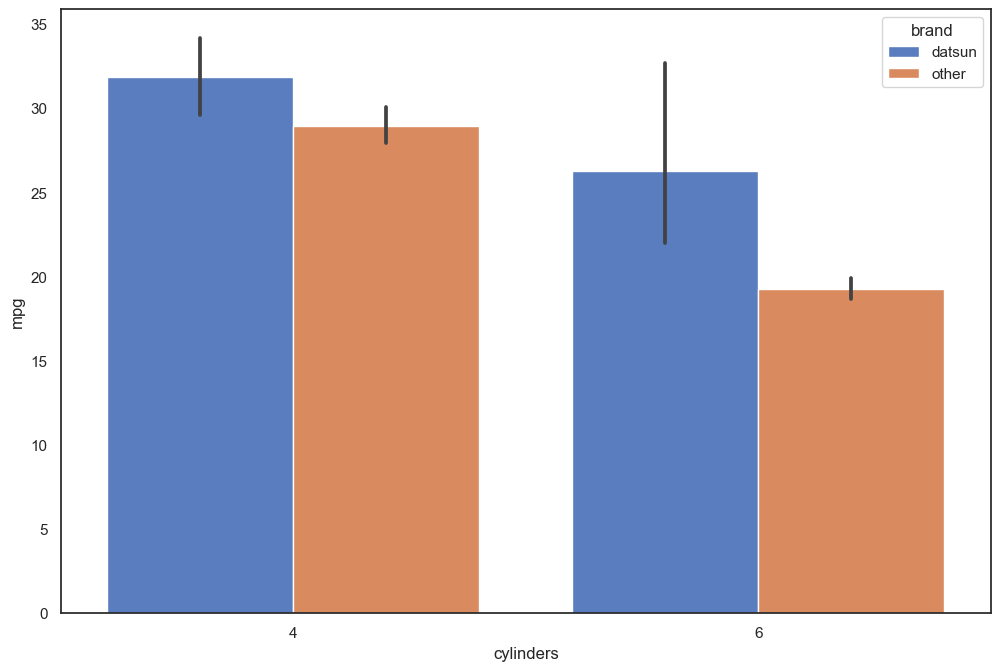

In [63]:
enough_sample = df1['brand'].unique()
X = input('Παρακαλώ επιλέξτε μεταξύ των παραπάνω μαρκών: ')
while X not in enough_sample:
    X = input('Παρακαλώ επιλέξτε μεταξύ των παραπάνω μαρκών: ')

brand_mpg(X)

Παρατηρούμε από τα παραπάνω ότι δεν οδηγούμαστε κάπου βασιζόμενοι στις μάρκες. Τα barplots είναι πολύ κοντά όταν
συγκρίνουμε το mpg μιας μαρκας με το mpg των υπολοίπων

In [57]:
df.describe(include='bool')
#βλέπω 48 τιμές για το sw και 18 για το custom. Τα υπόλοιπα μοιάζουν πολύ λίγα

,sw,custom,brougham,diesel,turbo,classic,dl,coupe,deluxe,sport,pickup,auto,man,2+2
count,406,406,406,406,406,406,406,406,406,406,406,406,406,406
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,358,388,396,399,404,400,400,401,401,403,405,404,402,404


In [58]:
pd.pivot_table(df, index='sw', columns='cylinders', values='mpg')

cylinders,3,4,5,6,8
sw,,,,,
False,20.55,29.591573,27.366667,20.009639,15.047126
True,NaN,27.200000,NaN,18.000000,14.506250


In [59]:
display(df.sw.mean())

0.11822660098522167

In [60]:
display(df.custom.mean())

0.04433497536945813

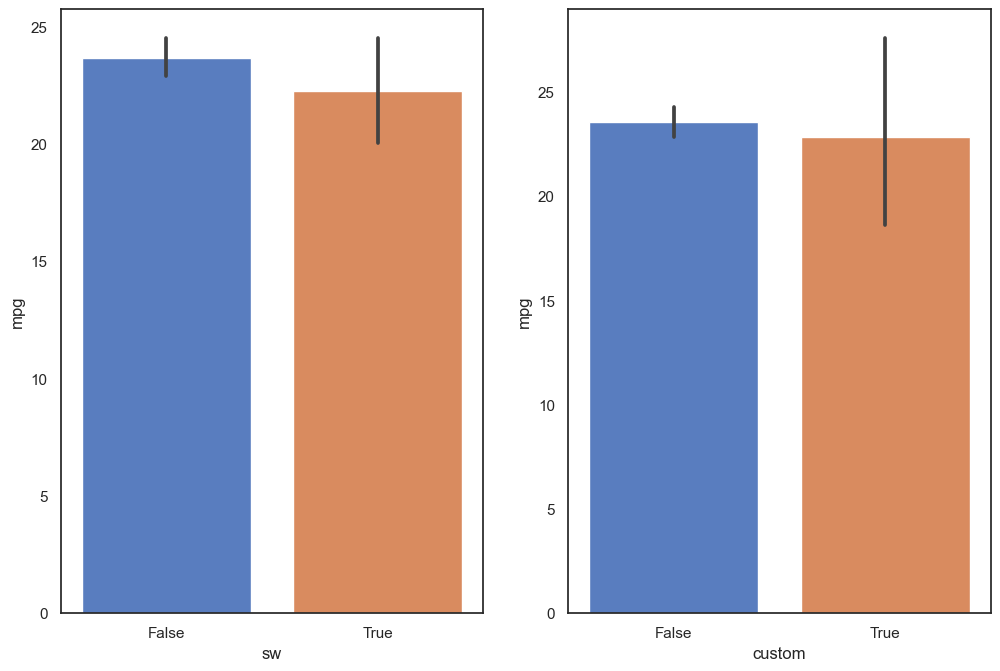

In [61]:
fig, axes = plt.subplots(1,2)

sns.barplot(ax=axes[0],y='mpg', x='sw', data=df)
sns.barplot(ax=axes[1],y='mpg', x='custom', data=df)
    
plt.show()

 Σύνοψη των τελευταίων. Οι μόνες δύο λέξεις που υπήρχαν σε πληθώρα μέσα στα car_names ( πλην brands)
 είναι το sw και το custom. Για να δούμε αν έχουν κάποια κομβική σχέση με το mpg κάναμε το εξής.
 Στο πρώτο διάγραμμα έχουμε το μέσο mpg με μπλε όταν το αυτοκίνητο περιέχει τη λέξη sw και όταν όχι.Ομοίως στο δεύτερο διάγραμμα για τη λέξη custom. Παρατηρούμε και στα 2 διαγράμματα ότι οι λέξεις δεν παίζουν σχεδόν καθόλου ρόλο αφόυ τα μέσο mpg δείχνει όμοι και στις 2 περιπτώσεις αντίστοιχα.

## Outliers Exploration

Από τα διαγράμματα δεν είδαμε κάποια πολύ περίεργη τιμή ή κάτι να ξεφεύγει σε σχέση με τα υπόλοιπα. Για επαλήθευση χρησιμοποιούμε σύγκριση αποστάσεων με βάση την τυπική απόκλιση και βρίσκουμε όντως μόνο 4 τιμές για το horsepower και 2 για το accelaration, ενώ στις υπόλοιπες αριθμητικές παραμέτρους δεν έχουμε καμία τιμή.

In [62]:
def outliers(column):
    factor = 3
    upper_lim = column.mean () + column.std () * factor
    lower_lim = column.mean () - column.std () * factor

    df1 = df[(column > upper_lim) | (column < lower_lim)]
    return df1
# Η παρακάτω for είναι για να πάρω απευθείας απο όποιο dataset θέλω το σύνολο των outliers της κάθε numerical column
for column in df.select_dtypes(include=None, exclude=(object, bool)).columns:
    

    print(column,len(outliers(df[column])))

mpg 0
cylinders 0
displayments 0
horsepower 4
weight 0
acceleration 2
model year 0
